# Visualizing Geographic Data with Choropleth Maps in Plotly

Choropleth maps are a powerful way to visualize how a variable varies across geographic regions. In this lecture, we’ll learn how to create choropleth maps using Plotly for both U.S. states and the world, using real data.

## What You’ll Learn
By the end of this lecture, you will be able to:

- Set up Plotly for offline use in Jupyter Notebooks.

- Create a U.S. choropleth map from scratch.

- Load real datasets for geographic visualization.

- Build global choropleth maps with real-world indicators.

- Customize layouts, color scales, and markers.



##  Setup: Offline Plotly in Jupyter

In [4]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import pandas as pd

# Activate offline mode
init_notebook_mode(connected=True)


## US Choropleth Map – Population Density Example

We'll use the 2018 U.S. Census Bureau population estimates by state, available on [Simplemaps](https://simplemaps.com/data/us-cities). A cleaned CSV version can be found here:
https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv
(Note: we’ll simulate a similar one with population instead.)



In [7]:
# Sample US state population density data (replace with real updated data if needed)
data_url = 'https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv'
df_us = pd.read_csv(data_url)

df_us[['state', 'code', 'total exports']].head()


,state,code,total exports
0,Alabama,AL,1390.63
1,Alaska,AK,13.31
2,Arizona,AZ,1463.17
3,Arkansas,AR,3586.02
4,California,CA,16472.88


**Now we’ll use this data to create a US choropleth map:**

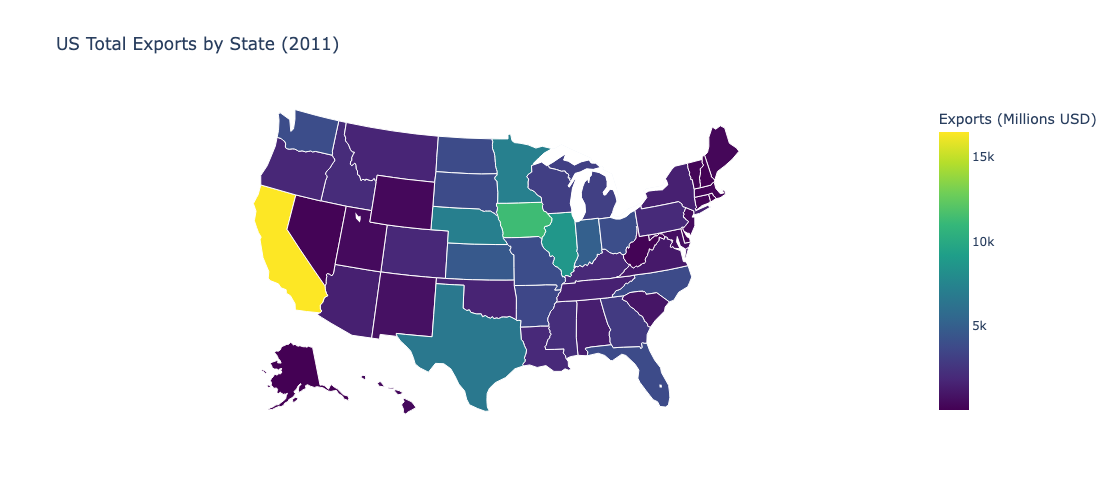

In [20]:
data = dict(
    type='choropleth',
    locations=df_us['code'],  # Two-letter state codes
    locationmode='USA-states',
    z=df_us['total exports'],  # Replace with population if using another dataset
    text=df_us['state'],
    colorscale='Viridis',
    colorbar={'title': 'Exports (Millions USD)'},
    marker=dict(line=dict(color='white', width=1))
)

layout = dict(
    title='US Total Exports by State (2011)',
    geo=dict(scope='usa'),height=500,width=1200
)

fig = go.Figure(data=[data], layout=layout)
iplot(fig)


## World Choropleth Map – CO₂ Emissions by Country

We’ll now create a choropleth map using worldwide CO₂ emissions data. You can find updated datasets here:

[Our World in Data – CO₂ Emissions](https://ourworldindata.org/co2-emissions)

For this example, we use a CSV sample hosted on GitHub:
https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv


In [15]:
# Load dataset
url_world = 'https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv'
df_world = pd.read_csv(url_world)

# Filter for most recent year and relevant columns
df_latest = df_world[df_world['year'] == 2020]
df_latest = df_latest[['iso_code', 'country', 'co2']].dropna()
df_latest = df_latest[df_latest['iso_code'].str.len() == 3]  # ISO-3 codes only
df_latest.head()


,iso_code,country,co2
270,AFG,Afghanistan,11.606
892,ALB,Albania,4.711
1066,DZA,Algeria,168.178
1340,AND,Andorra,0.381
1514,AGO,Angola,16.533


**Create a global choropleth map showing CO₂ emissions:**

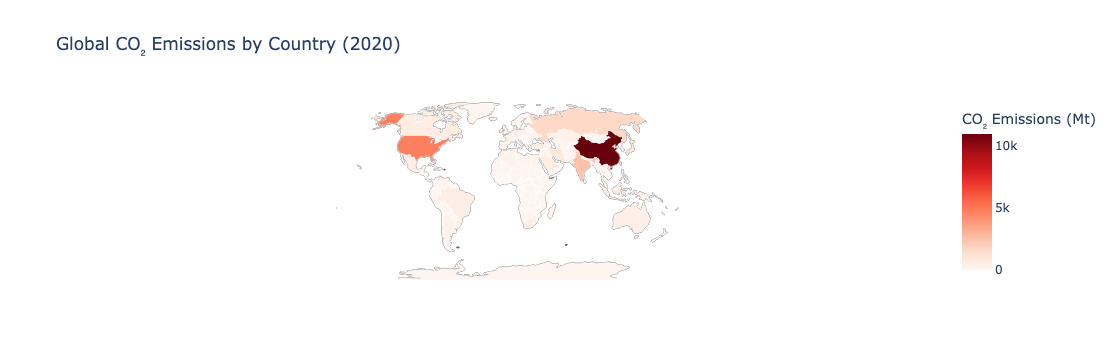

In [17]:
data = dict(
    type='choropleth',
    locations=df_latest['iso_code'],
    z=df_latest['co2'],
    text=df_latest['country'],
    colorscale='Reds',
    colorbar={'title': 'CO₂ Emissions (Mt)'},
    marker=dict(line=dict(color='white', width=0.5))
)

layout = dict(
    title='Global CO₂ Emissions by Country (2020)',
    geo=dict(
        showframe=False,
        projection=dict(type='natural earth')
    )
)

fig = go.Figure(data=[data], layout=layout)
iplot(fig)


## Customize Your Map (Optional Tips)

You can customize your choropleth maps with:

- colorscale: choose from built-in or custom gradients.

- marker: adjust border lines of regions.

- geo: control projection type and visible features (lakes, land, etc.).

- text: hover tooltips with rich information.

